In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

In [2]:
# read in combine + careers dataset
cc = pd.read_csv('cc.csv')
cc.head()

,Player,Pk,Height (No Shoes),Height (With Shoes),Wingspan,Standing reach,Vertical (Max),Vertical (Max Reach),Vertical (No Step),Vertical (No Step Reach),Weight,Body Fat,Hand (Length),Hand (Width),Bench,Agility,Sprint,Rk,Year,Tm,Age,Pos,Born,College,From,To,G,MPG,PPG,RPG,APG,SPG,BPG,FG%,2P%,3P%,FT%,WS,WS/48
0,Blake Griffin,1.0,80.50,82.00,83.25,105.0,35.5,140.5,32.0,137.0,248.0,8.2,NaN,NaN,22.0,10.95,3.28,19,2009,LAC,20.106,F,us,Oklahoma,2011.0,2019.0,604.0,35.0,21.9,9.0,4.5,0.9,0.5,0.502,0.522,0.342,0.692,75.3,0.171
1,Terrence Williams,11.0,77.00,78.25,81.00,103.5,37.0,140.5,30.5,134.0,213.0,5.1,NaN,NaN,9.0,11.15,3.18,464,2009,NJN,22.003,F,us,Louisville,2010.0,2013.0,153.0,19.1,7.1,3.6,2.4,0.5,0.1,0.412,0.432,0.317,0.659,-0.2,-0.004
2,Gerald Henderson,12.0,76.00,77.00,82.25,102.5,35.0,137.5,31.5,134.0,215.0,4.4,NaN,NaN,8.0,11.17,3.14,258,2009,CHA,21.204,G,us,Duke,2010.0,2017.0,535.0,25.9,11.2,3.2,1.9,0.7,0.3,0.440,0.460,0.327,0.793,18.3,0.063
3,Tyler Hansbrough,13.0,80.25,81.50,83.50,106.0,34.0,140.0,27.5,133.5,234.0,8.5,NaN,NaN,18.0,11.12,3.27,58,2009,IND,23.240,F,us,UNC,2010.0,2016.0,428.0,16.9,6.7,4.2,0.4,0.5,0.2,0.439,0.442,0.136,0.738,20.2,0.134
4,Earl Clark,14.0,80.50,82.25,86.50,109.5,33.0,142.5,28.5,138.0,228.0,5.2,NaN,NaN,5.0,11.17,3.35,329,2009,PHO,21.165,F,us,Louisville,2010.0,2015.0,261.0,13.9,4.4,3.0,0.5,0.3,0.5,0.403,0.424,0.328,0.664,2.9,0.038


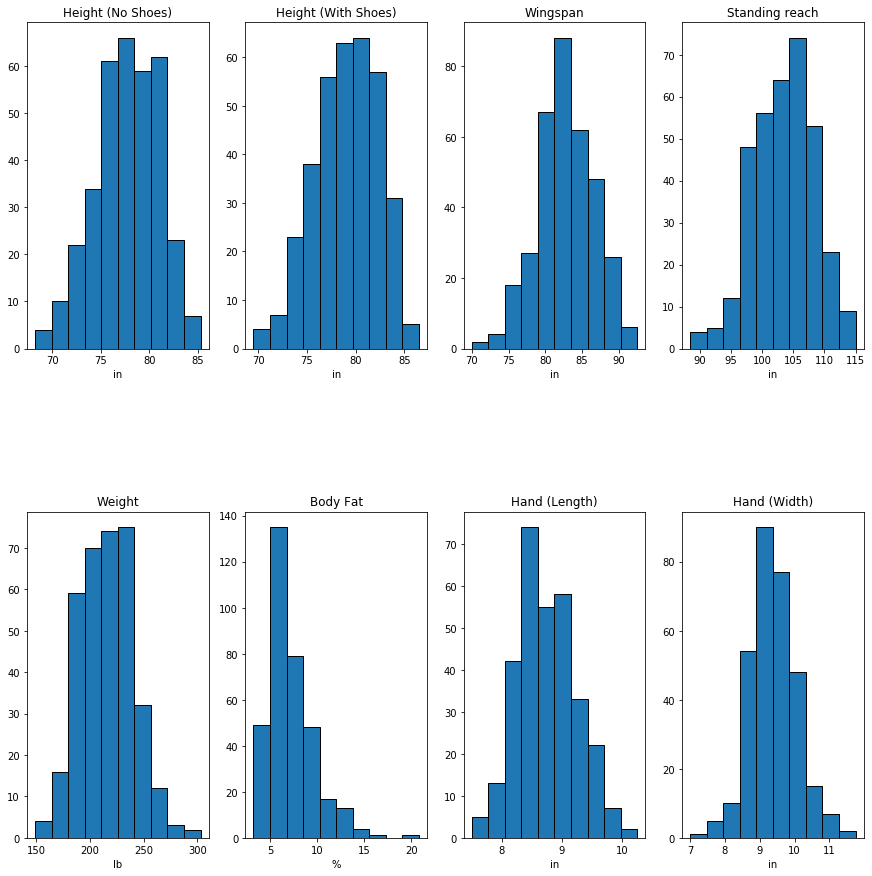

In [9]:
physicals = ['Height (No Shoes)', 'Height (With Shoes)', 'Wingspan', 'Standing reach', 
             'Weight', 'Body Fat', 'Hand (Length)', 'Hand (Width)']
athletics = ['Vertical (Max)', 'Bench', 'Agility', 'Sprint']

fig = plt.figure(figsize = (15, 15))   
for i in range(1, 9):
    plt.subplot(2, 4, i)
    plt.hist(physicals[i - 1], data = cc[cc[physicals[i - 1]].notnull()],
            histtype = 'bar', ec = 'black')
    plt.subplots_adjust(hspace = 0.5)
    plt.title(physicals[i - 1])
    if physicals[i - 1] == 'Weight':
        plt.xlabel('lb')
    elif physicals[i - 1] == 'Body Fat':
        plt.xlabel('%')
    else:
        plt.xlabel('in')
     
plt.show()